In [315]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
import pandas_datareader as pdr
import tensorflow
import keras
from keras.preprocessing import sequence
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import time
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.svm import SVR, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools
from statsmodels.tsa.arima_model import ARIMA
import math
from pandas.plotting import lag_plot

In [316]:
pip install pmdarima

In [317]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [318]:
import yfinance as yf
import datetime

ticker = 'IDFCFIRSTB.NS'
start_date = datetime.datetime(2018, 1, 1)
end_date = datetime.datetime(2024, 4, 9)

df = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [319]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,54.400002,55.400002,54.250000,54.849998,53.733650,4483875
2018-01-02,55.000000,55.200001,53.750000,53.950001,52.851967,4912922
2018-01-03,54.299999,54.599998,54.000000,54.150002,53.047897,3088116
2018-01-04,54.200001,54.700001,53.900002,54.549999,53.439754,3665726
2018-01-05,54.650002,58.799999,54.650002,58.250000,57.064449,24488254
...,...,...,...,...,...,...
2024-04-02,77.500000,79.449997,77.050003,79.150002,79.150002,46916727
2024-04-03,78.800003,78.949997,78.150002,78.400002,78.400002,41884727
2024-04-04,79.000000,80.099998,78.550003,79.449997,79.449997,51797671


In [320]:
df.shape

(1547, 6)

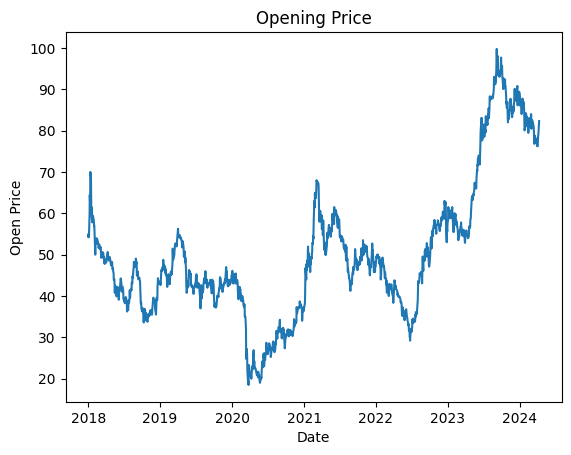

In [321]:
plt.figure()
plt.title('Opening Price')
plt.plot(df['Open'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.show()

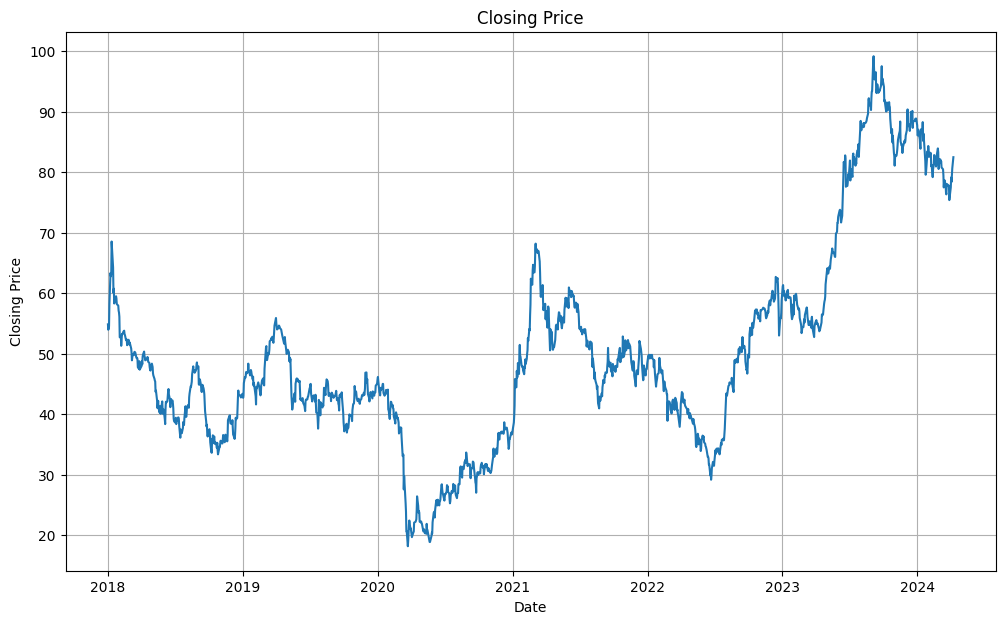

In [322]:
plt.figure(figsize=(12,7))
plt.title('Closing Price')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.grid(True)
plt.ylabel('Closing Price')
plt.savefig(f'CP_{ticker}.png')

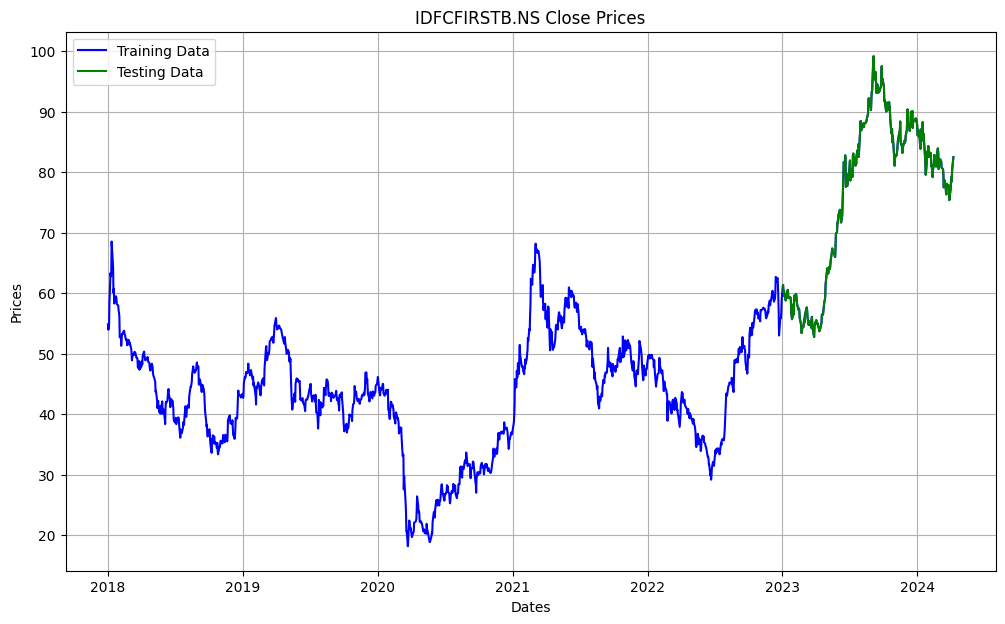

In [323]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title(f'{ticker} Close Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close'], 'blue', label='Training Data')
plt.plot(test_data['Close'], 'green', label='Testing Data')
plt.grid(True)
plt.legend()

In [324]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()

for t in range(len(test_ar)):
    model = ARIMA(history, order=(1, 1, 1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)

<class 'list'>


In [325]:
error = mean_squared_error(test_ar, predictions)
print('Mean Squared Error: %.3f' % error)

error2 = smape_kun(test_ar, predictions)
print('Symmetric Mean Absolute Error: %.3f' % error2)

rmse = np.sqrt(mean_squared_error(test_ar, predictions))
mae = mean_absolute_error(test_ar, predictions)

print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

# Calculate accuracy percentage
accuracy_percentage = 100 - error2
print("Accuracy Percentage:", accuracy_percentage)

Mean Squared Error: 1.629
Symmetric Mean Absolute Error: 1.247
Root Mean Squared Error: 1.2764180935899747
Mean Absolute Error: 0.9546620319895164
Accuracy Percentage: 98.75302390119774


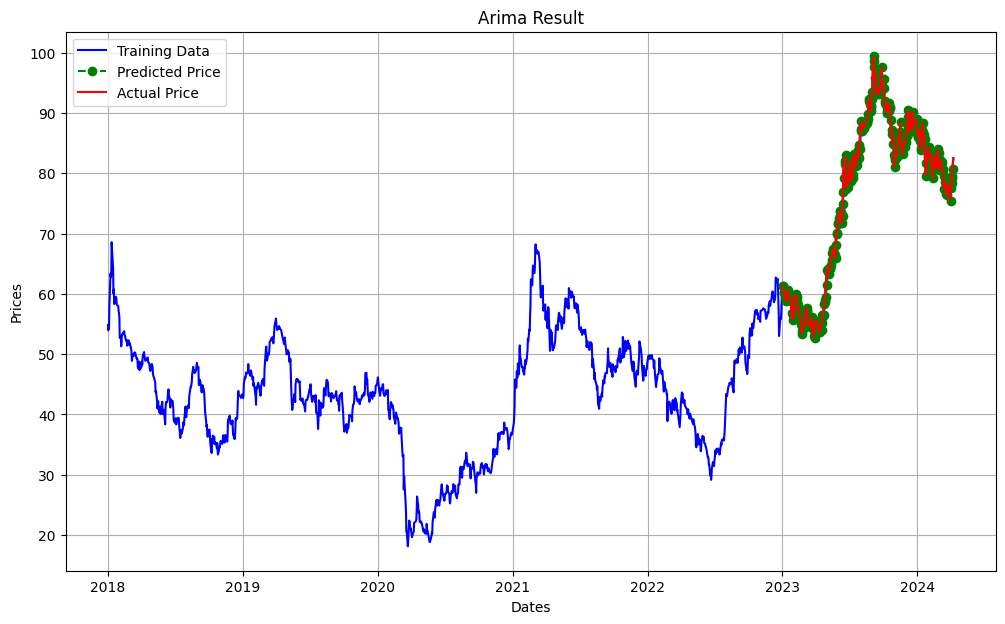

In [326]:
plt.figure(figsize=(12,7))
plt.plot(df['Close'],'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('Arima Result')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.grid(True)
plt.savefig(f'arima_{ticker}.png')
plt.legend()

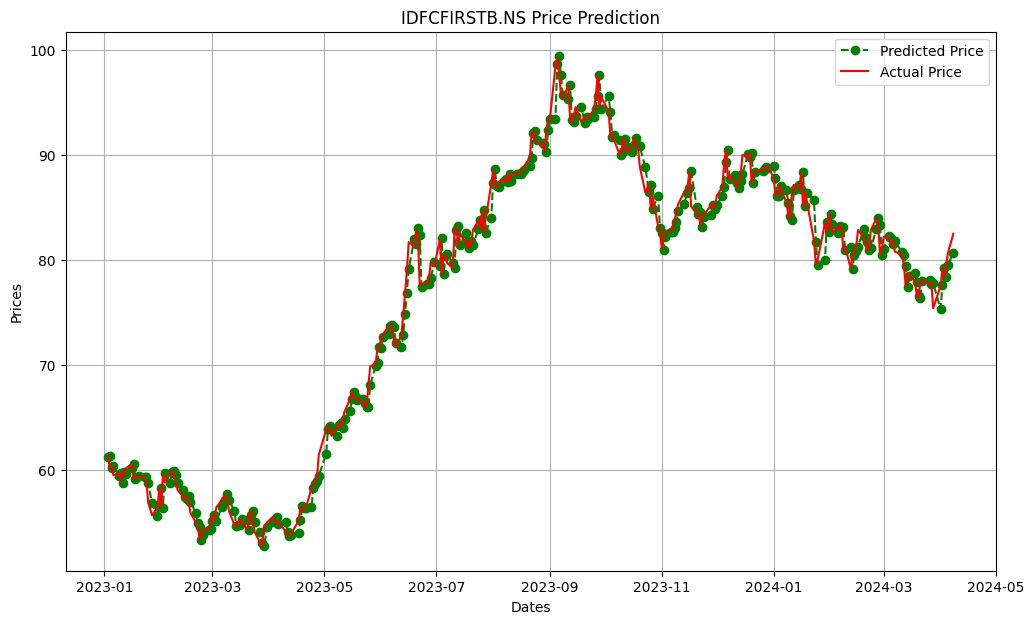

In [327]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title(f'{ticker} Price Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.grid(True)
plt.legend()

In [328]:
actual=pd.DataFrame()
actual=pd.DataFrame(test_ar,columns=["Actual"])
predicted=pd.DataFrame(list(predictions),columns=["Predicted"])
actual=actual.reset_index(drop=True)
predicted=predicted.reset_index(drop=True)
output=pd.concat([actual,predicted],axis=1)
print(output.head(10))

      Actual  Predicted
0  61.349998  61.228811
1  60.200001  61.341772
2  60.349998  60.156767
3  59.500000  60.367277
4  59.700001  59.462021
5  58.799999  59.717024
6  59.799999  58.760586
7  59.599998  59.847624
8  60.200001  59.582085
9  60.549999  60.226748


<h1><b>Getting Predictions for 60 days from now<b></h1>

In [329]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Assuming train_data and test_data are your datasets
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

# Using the entire dataset to train the model
model = ARIMA(test_ar, order=(2, 0, 1))
model_fit = model.fit()

# Forecasting 60 days ahead
forecast_dates = pd.date_range(start=df.index[-1], periods=61, freq='B')[1:]  # Assuming daily frequency, excluding today
forecast = model_fit.forecast(steps=60)
predicted_values_60_days = forecast

# Creating a DataFrame with dates and predicted values
predicted_df = pd.DataFrame({'Date': forecast_dates, 'Predicted_Close': predicted_values_60_days})

predicted_df.to_csv(f'pred.arima.{ticker}.csv', index=False)


# Printing the DataFrame
print(predicted_df)


         Date  Predicted_Close
0  2024-04-09        82.435714
1  2024-04-10        82.377672
2  2024-04-11        82.324240
3  2024-04-12        82.274227
4  2024-04-15        82.226762
5  2024-04-16        82.181211
6  2024-04-17        82.137110
7  2024-04-18        82.094121
8  2024-04-19        82.051996
9  2024-04-22        82.010556
10 2024-04-23        81.969667
11 2024-04-24        81.929234
12 2024-04-25        81.889186
13 2024-04-26        81.849471
14 2024-04-29        81.810050
15 2024-04-30        81.770897
16 2024-05-01        81.731989
17 2024-05-02        81.693313
18 2024-05-03        81.654856
19 2024-05-06        81.616609
20 2024-05-07        81.578567
21 2024-05-08        81.540723
22 2024-05-09        81.503075
23 2024-05-10        81.465619
24 2024-05-13        81.428353
25 2024-05-14        81.391275
26 2024-05-15        81.354382
27 2024-05-16        81.317673
28 2024-05-17        81.281147
29 2024-05-20        81.244803
30 2024-05-21        81.208640
31 2024-

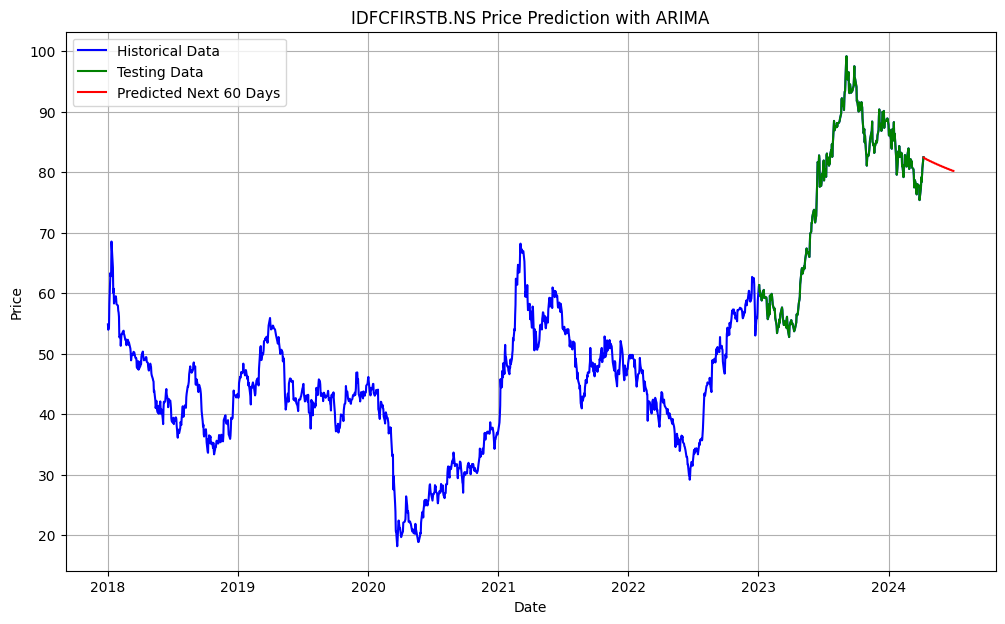

In [330]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Assuming train_data and test_data are your datasets
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

# Fitting the ARIMA model
model = ARIMA(test_ar, order=(2, 0, 1))  # Adjust order as needed
model_fit = model.fit()

# Forecasting 60 days ahead
forecast_steps = 60
forecast = model_fit.forecast(steps=forecast_steps)
predicted_values_60_days = forecast

# Creating a date range for the next 60 days
forecast_dates = pd.date_range(start=df.index[-1], periods=61, freq='B')[1:]  # Assuming daily frequency, excluding today

# Creating a DataFrame with dates and predicted values
predicted_df_arima = pd.DataFrame({'Date': forecast_dates, 'Predicted_Close': predicted_values_60_days})

# Plotting the overall data
plt.figure(figsize=(12, 7))
plt.plot(df.index, df['Close'], label='Historical Data', color='blue')
plt.plot(test_data.index, test_data['Close'], label='Testing Data', color='green')
plt.plot(predicted_df_arima['Date'], predicted_df_arima['Predicted_Close'], label='Predicted Next 60 Days', color='red')

# Adding titles and labels
plt.title(f'{ticker} Price Prediction with ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.savefig(f'prediction.arima_{ticker}.png')
plt.show()